# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

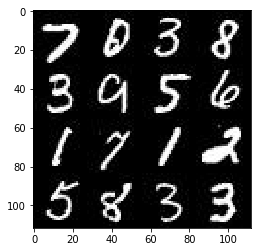

In [2]:
show_n_images = 16

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

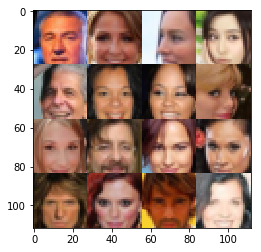

In [3]:
show_n_images = 16

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

##*******************************************************
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name='input_real')
    input_z = tf.placeholder(tf.float32, [None, z_dim], name="input_z")
    lr = tf.placeholder(tf.float32, None, name="learning_rate")
    return input_real, input_z, lr
##******************************************************



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


## Generator network

![GAN Network](assets/gan_network.png)

Here we'll build the generator network. To make this network a universal function approximator, we'll need at least one hidden layer. We should use a leaky ReLU to allow gradients to flow backwards through the layer unimpeded. A leaky ReLU is like a normal ReLU, except that there is a small non-zero output for negative input values.

#### Variable Scope
Here we need to use `tf.variable_scope` for two reasons. Firstly, we're going to make sure all the variable names start with `generator`. Similarly, we'll prepend `discriminator` to the discriminator variables. This will help out later when we're training the separate networks.

**Approach**

* We will build a GAN using convolutional layers in the generator and discriminator (Deep Convolutional GAN, or DCGAN). 
* We will use batch normalization to get the convolutional networks to train. 

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.01):
# add a leaky relu parameter "alpha" with a small value, for negative relu inputs,as an argument to the discriminator function. 
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    # 
##########################################################
    # Using Leaky RELU ( see https://www.tensorflow.org/versions/r0.12/api_docs/python/nn/activation_functions_)
    lrelu_d = lambda xd: tf.maximum(alpha * xd, xd) 
    
    # Convolutional layer with batch normalization    
    def conv(inputs_, filters, batch_normalize=True):
        outputs_ = tf.layers.conv2d(inputs_, filters, 5, strides=2, padding='same')
        if batch_normalize:
            outputs_= tf.layers.batch_normalization(outputs_, training=True)
        return lrelu_d(outputs_)
        
    
    with tf.variable_scope("discriminator", reuse=reuse):
        # input 28*28*3 (in the datasets)
        # convolve to layers of dimension 14*14*64, 7*7*128, and 4*4*256, successively
        
        conv1 = conv(images, 64, batch_normalize=False) # 14*14*64; no batch normalization for the first layer
        conv2 = conv(conv1, 128) # 7*7*128
        conv3 = conv(conv2, 256) # 4*4*256
        
        flatten = tf.reshape(conv3, (-1, 4*4*256)) # flatten using reshape function        
        logits_d = tf.layers.dense(flatten, 1) # calculate logits for a dense layer
        output_d = tf.sigmoid(logits_d) # apply sigmoid activation to the discriminator logits

        return output_d, logits_d
##########################################################

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.01):
# add a leaky relu parameter "alpha" with a small value, for negative relu inputs,as an argument to the generator function.
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
##########################################################
    # leaky ReLU for the generator
    lrelu_g = lambda xg: tf.maximum(alpha * xg, xg)
    with tf.variable_scope("generator", reuse=not is_train):
        g1 = tf.layers.dense(z, 7*7*512) # the number of channels in the output image will be 7*7*512
        # the argument -1 means the size of that dimension is computed so that the total size remains constant.       
        g1 = tf.reshape(g1, (-1, 7, 7, 512))
        #use batch normalization and a leaky ReLU activation
        g1 = tf.layers.batch_normalization(g1, training=is_train)
        g1 = lrelu_g(g1) 
        
        # Use 256 filters and stride=1 to change the number of channels in the output image to 7*7*256
        g2 = tf.layers.conv2d_transpose(g1, 256, 5, strides=1, padding='SAME') 
        #use batch normalization and a leaky ReLU activation
        g2 = tf.layers.batch_normalization(g2, training=is_train)
        g2 = lrelu_g(g2)
        
        # Use 128 filters and stride=2 to change the number of channels in the output image to 14*14*128
        g3 = tf.layers.conv2d_transpose(g2, 128, 5, strides=2, padding='SAME') 
        #use batch normalization and a leaky ReLU activation
        g3 = tf.layers.batch_normalization(g3, training=is_train)
        g3 = lrelu_g(g3)
        
        # number of channels in the output image to 28*128*out_channel_dim
        logits = tf.layers.conv2d_transpose(g3, out_channel_dim, 5, strides=2, padding='SAME')
        output_g = tf.tanh(logits) # use tanh activation function
        
        return output_g
    
##########################################################


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
#def model_loss(input_real, input_z, out_channel_dim):
def model_loss(input_real, input_z, out_channel_dim, alpha=0.9):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
##########################################################
    gener= generator(input_z, out_channel_dim)
    discr_real, discr_logits_real = discriminator(input_real)
    discr_fake, discr_logits_fake = discriminator(gener, reuse=True)
       


    discr_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=discr_logits_real, labels=tf.ones_like(discr_logits_real) * alpha))
    discr_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=discr_logits_fake, labels=tf.zeros_like(discr_logits_fake)))
    generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=discr_logits_fake, labels=tf.ones_like(discr_logits_fake)))

    discriminator_loss = discr_loss_real + discr_loss_fake

    return discriminator_loss, generator_loss
    
##########################################################


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function

###########################################################

##############################################
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize using AdamOptimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

###########################################################

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
############
    # Inputs
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    # losses
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    # outputs of optimization operations for the GANs
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
#-----------------------------------
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    training_loss_discriminator = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    training_loss_generator = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(training_loss_discriminator),
                          "Generator Loss: {:.4f}".format(training_loss_generator))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)
                
#--------------------------------
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 8.1577... Generator Loss: 0.0008
Epoch 1/2... Batch 20... Discriminator Loss: 3.7651... Generator Loss: 0.2221
Epoch 1/2... Batch 30... Discriminator Loss: 0.4962... Generator Loss: 5.9253
Epoch 1/2... Batch 40... Discriminator Loss: 0.7191... Generator Loss: 1.3794
Epoch 1/2... Batch 50... Discriminator Loss: 0.7494... Generator Loss: 2.8750
Epoch 1/2... Batch 60... Discriminator Loss: 0.7602... Generator Loss: 1.5981
Epoch 1/2... Batch 70... Discriminator Loss: 0.6812... Generator Loss: 2.0106
Epoch 1/2... Batch 80... Discriminator Loss: 0.9634... Generator Loss: 1.5928
Epoch 1/2... Batch 90... Discriminator Loss: 1.7850... Generator Loss: 0.3356
Epoch 1/2... Batch 100... Discriminator Loss: 1.5371... Generator Loss: 2.1618


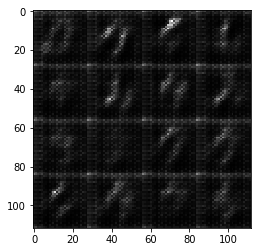

Epoch 1/2... Batch 110... Discriminator Loss: 1.2726... Generator Loss: 0.9183
Epoch 1/2... Batch 120... Discriminator Loss: 1.4071... Generator Loss: 0.6987
Epoch 1/2... Batch 130... Discriminator Loss: 1.0661... Generator Loss: 1.0074
Epoch 1/2... Batch 140... Discriminator Loss: 0.8751... Generator Loss: 1.8190
Epoch 1/2... Batch 150... Discriminator Loss: 1.0382... Generator Loss: 1.2248
Epoch 1/2... Batch 160... Discriminator Loss: 1.5987... Generator Loss: 2.9829
Epoch 1/2... Batch 170... Discriminator Loss: 1.2403... Generator Loss: 1.0509
Epoch 1/2... Batch 180... Discriminator Loss: 1.0443... Generator Loss: 1.3064
Epoch 1/2... Batch 190... Discriminator Loss: 1.2381... Generator Loss: 1.4713
Epoch 1/2... Batch 200... Discriminator Loss: 1.4466... Generator Loss: 1.9704


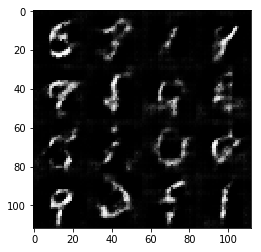

Epoch 1/2... Batch 210... Discriminator Loss: 1.3797... Generator Loss: 0.7317
Epoch 1/2... Batch 220... Discriminator Loss: 1.2355... Generator Loss: 0.7704
Epoch 1/2... Batch 230... Discriminator Loss: 1.8304... Generator Loss: 0.3125
Epoch 1/2... Batch 240... Discriminator Loss: 1.2298... Generator Loss: 0.8044
Epoch 1/2... Batch 250... Discriminator Loss: 1.2573... Generator Loss: 1.3862
Epoch 1/2... Batch 260... Discriminator Loss: 1.3342... Generator Loss: 0.9554
Epoch 1/2... Batch 270... Discriminator Loss: 1.3889... Generator Loss: 1.2990
Epoch 1/2... Batch 280... Discriminator Loss: 1.3700... Generator Loss: 0.5504
Epoch 1/2... Batch 290... Discriminator Loss: 1.3029... Generator Loss: 0.6906
Epoch 1/2... Batch 300... Discriminator Loss: 1.1259... Generator Loss: 1.4497


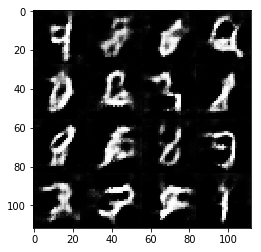

Epoch 1/2... Batch 310... Discriminator Loss: 1.3492... Generator Loss: 0.5579
Epoch 1/2... Batch 320... Discriminator Loss: 1.3585... Generator Loss: 0.5633
Epoch 1/2... Batch 330... Discriminator Loss: 1.3018... Generator Loss: 1.7022
Epoch 1/2... Batch 340... Discriminator Loss: 1.2962... Generator Loss: 0.5960
Epoch 1/2... Batch 350... Discriminator Loss: 1.2052... Generator Loss: 1.1421
Epoch 1/2... Batch 360... Discriminator Loss: 1.2177... Generator Loss: 0.7190
Epoch 1/2... Batch 370... Discriminator Loss: 1.1795... Generator Loss: 1.1010
Epoch 1/2... Batch 380... Discriminator Loss: 1.1577... Generator Loss: 0.7892
Epoch 1/2... Batch 390... Discriminator Loss: 1.3258... Generator Loss: 0.6072
Epoch 1/2... Batch 400... Discriminator Loss: 1.2222... Generator Loss: 1.1628


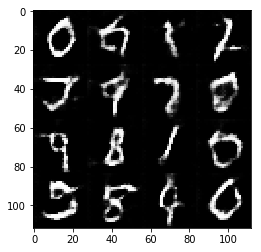

Epoch 1/2... Batch 410... Discriminator Loss: 1.2151... Generator Loss: 0.6777
Epoch 1/2... Batch 420... Discriminator Loss: 1.2674... Generator Loss: 0.8853
Epoch 1/2... Batch 430... Discriminator Loss: 1.3564... Generator Loss: 0.5802
Epoch 1/2... Batch 440... Discriminator Loss: 1.2556... Generator Loss: 1.0895
Epoch 1/2... Batch 450... Discriminator Loss: 1.1703... Generator Loss: 0.8763
Epoch 1/2... Batch 460... Discriminator Loss: 1.5175... Generator Loss: 0.4975
Epoch 1/2... Batch 470... Discriminator Loss: 1.1555... Generator Loss: 0.8091
Epoch 1/2... Batch 480... Discriminator Loss: 1.1866... Generator Loss: 1.7371
Epoch 1/2... Batch 490... Discriminator Loss: 1.1870... Generator Loss: 0.9798
Epoch 1/2... Batch 500... Discriminator Loss: 1.1412... Generator Loss: 0.8642


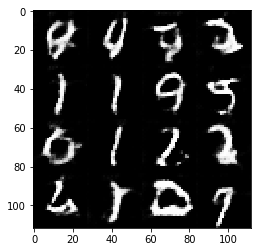

Epoch 1/2... Batch 510... Discriminator Loss: 1.4488... Generator Loss: 1.8757
Epoch 1/2... Batch 520... Discriminator Loss: 1.2066... Generator Loss: 0.7407
Epoch 1/2... Batch 530... Discriminator Loss: 1.3417... Generator Loss: 0.5613
Epoch 1/2... Batch 540... Discriminator Loss: 1.8719... Generator Loss: 0.2982
Epoch 1/2... Batch 550... Discriminator Loss: 1.4830... Generator Loss: 0.4621
Epoch 1/2... Batch 560... Discriminator Loss: 1.6577... Generator Loss: 0.3807
Epoch 1/2... Batch 570... Discriminator Loss: 1.1804... Generator Loss: 0.8009
Epoch 1/2... Batch 580... Discriminator Loss: 1.2358... Generator Loss: 0.7412
Epoch 1/2... Batch 590... Discriminator Loss: 1.7106... Generator Loss: 2.2224
Epoch 1/2... Batch 600... Discriminator Loss: 1.3281... Generator Loss: 0.5883


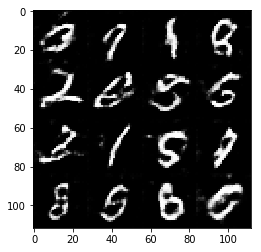

Epoch 1/2... Batch 610... Discriminator Loss: 1.0250... Generator Loss: 1.0488
Epoch 1/2... Batch 620... Discriminator Loss: 1.1689... Generator Loss: 0.8566
Epoch 1/2... Batch 630... Discriminator Loss: 1.0052... Generator Loss: 1.1761
Epoch 1/2... Batch 640... Discriminator Loss: 1.4629... Generator Loss: 0.4969
Epoch 1/2... Batch 650... Discriminator Loss: 1.0991... Generator Loss: 1.4171
Epoch 1/2... Batch 660... Discriminator Loss: 1.0982... Generator Loss: 1.3979
Epoch 1/2... Batch 670... Discriminator Loss: 1.0944... Generator Loss: 1.3804
Epoch 1/2... Batch 680... Discriminator Loss: 1.1175... Generator Loss: 1.0516
Epoch 1/2... Batch 690... Discriminator Loss: 1.1246... Generator Loss: 1.5608
Epoch 1/2... Batch 700... Discriminator Loss: 1.0878... Generator Loss: 1.2236


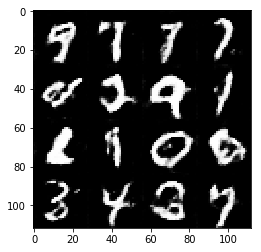

Epoch 1/2... Batch 710... Discriminator Loss: 1.4396... Generator Loss: 0.5260
Epoch 1/2... Batch 720... Discriminator Loss: 1.4069... Generator Loss: 0.5532
Epoch 1/2... Batch 730... Discriminator Loss: 1.2883... Generator Loss: 0.8540
Epoch 1/2... Batch 740... Discriminator Loss: 1.3418... Generator Loss: 0.7957
Epoch 1/2... Batch 750... Discriminator Loss: 1.1937... Generator Loss: 1.0387
Epoch 1/2... Batch 760... Discriminator Loss: 1.2682... Generator Loss: 1.4741
Epoch 1/2... Batch 770... Discriminator Loss: 1.1984... Generator Loss: 1.6320
Epoch 1/2... Batch 780... Discriminator Loss: 1.0995... Generator Loss: 0.9639
Epoch 1/2... Batch 790... Discriminator Loss: 1.4525... Generator Loss: 0.4954
Epoch 1/2... Batch 800... Discriminator Loss: 1.3630... Generator Loss: 0.5641


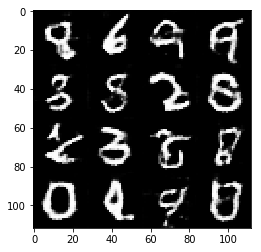

Epoch 1/2... Batch 810... Discriminator Loss: 1.1894... Generator Loss: 1.6917
Epoch 1/2... Batch 820... Discriminator Loss: 1.1698... Generator Loss: 0.7484
Epoch 1/2... Batch 830... Discriminator Loss: 1.4497... Generator Loss: 1.8719
Epoch 1/2... Batch 840... Discriminator Loss: 1.2071... Generator Loss: 0.8109
Epoch 1/2... Batch 850... Discriminator Loss: 1.1500... Generator Loss: 1.0006
Epoch 1/2... Batch 860... Discriminator Loss: 1.1905... Generator Loss: 0.7949
Epoch 1/2... Batch 870... Discriminator Loss: 1.0531... Generator Loss: 1.4327
Epoch 1/2... Batch 880... Discriminator Loss: 1.4492... Generator Loss: 1.8787
Epoch 1/2... Batch 890... Discriminator Loss: 1.0613... Generator Loss: 1.1101
Epoch 1/2... Batch 900... Discriminator Loss: 2.3387... Generator Loss: 0.2100


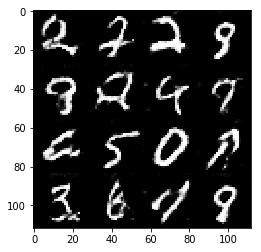

Epoch 1/2... Batch 910... Discriminator Loss: 1.2606... Generator Loss: 0.7925
Epoch 1/2... Batch 920... Discriminator Loss: 1.1563... Generator Loss: 0.7666
Epoch 1/2... Batch 930... Discriminator Loss: 1.0980... Generator Loss: 1.3120
Epoch 2/2... Batch 10... Discriminator Loss: 1.1175... Generator Loss: 1.1234
Epoch 2/2... Batch 20... Discriminator Loss: 1.0370... Generator Loss: 0.9804
Epoch 2/2... Batch 30... Discriminator Loss: 1.0285... Generator Loss: 1.5288
Epoch 2/2... Batch 40... Discriminator Loss: 1.0172... Generator Loss: 1.1638
Epoch 2/2... Batch 50... Discriminator Loss: 1.1557... Generator Loss: 0.7325
Epoch 2/2... Batch 60... Discriminator Loss: 1.0821... Generator Loss: 1.1913
Epoch 2/2... Batch 70... Discriminator Loss: 1.0395... Generator Loss: 1.3856
Epoch 2/2... Batch 80... Discriminator Loss: 1.1710... Generator Loss: 0.7744
Epoch 2/2... Batch 90... Discriminator Loss: 2.6188... Generator Loss: 3.7236
Epoch 2/2... Batch 100... Discriminator Loss: 1.0661... Gener

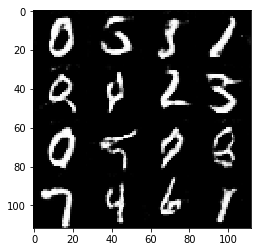

Epoch 2/2... Batch 110... Discriminator Loss: 1.0664... Generator Loss: 1.4296
Epoch 2/2... Batch 120... Discriminator Loss: 1.1465... Generator Loss: 0.8291
Epoch 2/2... Batch 130... Discriminator Loss: 2.1050... Generator Loss: 0.2669
Epoch 2/2... Batch 140... Discriminator Loss: 1.5180... Generator Loss: 0.4650
Epoch 2/2... Batch 150... Discriminator Loss: 0.9939... Generator Loss: 1.0247
Epoch 2/2... Batch 160... Discriminator Loss: 1.0554... Generator Loss: 1.4302
Epoch 2/2... Batch 170... Discriminator Loss: 1.3477... Generator Loss: 0.6245
Epoch 2/2... Batch 180... Discriminator Loss: 1.0883... Generator Loss: 0.8779
Epoch 2/2... Batch 190... Discriminator Loss: 1.0470... Generator Loss: 1.4023
Epoch 2/2... Batch 200... Discriminator Loss: 1.0352... Generator Loss: 1.3640


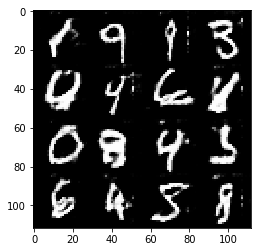

Epoch 2/2... Batch 210... Discriminator Loss: 1.1059... Generator Loss: 1.6385
Epoch 2/2... Batch 220... Discriminator Loss: 0.9951... Generator Loss: 1.2248
Epoch 2/2... Batch 230... Discriminator Loss: 1.1254... Generator Loss: 1.7631
Epoch 2/2... Batch 240... Discriminator Loss: 1.0821... Generator Loss: 1.2059
Epoch 2/2... Batch 250... Discriminator Loss: 1.0421... Generator Loss: 1.0241
Epoch 2/2... Batch 260... Discriminator Loss: 1.5152... Generator Loss: 0.4690
Epoch 2/2... Batch 270... Discriminator Loss: 1.1687... Generator Loss: 1.7461
Epoch 2/2... Batch 280... Discriminator Loss: 1.0376... Generator Loss: 1.0829
Epoch 2/2... Batch 290... Discriminator Loss: 1.0413... Generator Loss: 1.3544
Epoch 2/2... Batch 300... Discriminator Loss: 1.0046... Generator Loss: 1.7445


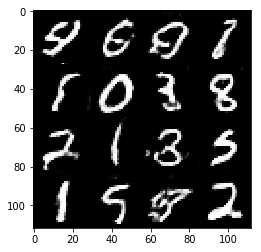

Epoch 2/2... Batch 310... Discriminator Loss: 1.4525... Generator Loss: 0.5050
Epoch 2/2... Batch 320... Discriminator Loss: 1.0263... Generator Loss: 1.0024
Epoch 2/2... Batch 330... Discriminator Loss: 1.3707... Generator Loss: 0.5337
Epoch 2/2... Batch 340... Discriminator Loss: 1.0939... Generator Loss: 0.8248
Epoch 2/2... Batch 350... Discriminator Loss: 1.4209... Generator Loss: 0.4880
Epoch 2/2... Batch 360... Discriminator Loss: 0.9038... Generator Loss: 2.0615
Epoch 2/2... Batch 370... Discriminator Loss: 1.2937... Generator Loss: 0.6708
Epoch 2/2... Batch 380... Discriminator Loss: 1.4920... Generator Loss: 3.0522
Epoch 2/2... Batch 390... Discriminator Loss: 1.2815... Generator Loss: 0.8745
Epoch 2/2... Batch 400... Discriminator Loss: 1.3585... Generator Loss: 0.5364


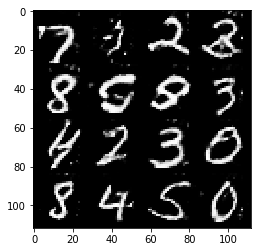

Epoch 2/2... Batch 410... Discriminator Loss: 0.9685... Generator Loss: 1.6391
Epoch 2/2... Batch 420... Discriminator Loss: 1.0159... Generator Loss: 0.9449
Epoch 2/2... Batch 430... Discriminator Loss: 1.0833... Generator Loss: 0.9685
Epoch 2/2... Batch 440... Discriminator Loss: 1.4164... Generator Loss: 1.8677
Epoch 2/2... Batch 450... Discriminator Loss: 1.4604... Generator Loss: 2.7163
Epoch 2/2... Batch 460... Discriminator Loss: 1.0817... Generator Loss: 1.5380
Epoch 2/2... Batch 470... Discriminator Loss: 1.0173... Generator Loss: 1.7085
Epoch 2/2... Batch 480... Discriminator Loss: 0.8325... Generator Loss: 1.3003
Epoch 2/2... Batch 490... Discriminator Loss: 1.2582... Generator Loss: 0.6362
Epoch 2/2... Batch 500... Discriminator Loss: 1.4423... Generator Loss: 0.5130


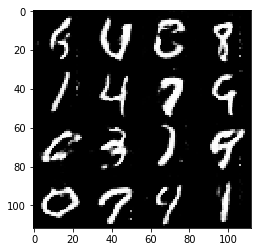

Epoch 2/2... Batch 510... Discriminator Loss: 1.0249... Generator Loss: 0.9058
Epoch 2/2... Batch 520... Discriminator Loss: 1.2154... Generator Loss: 0.7209
Epoch 2/2... Batch 530... Discriminator Loss: 1.8808... Generator Loss: 0.3300
Epoch 2/2... Batch 540... Discriminator Loss: 0.9811... Generator Loss: 1.0393
Epoch 2/2... Batch 550... Discriminator Loss: 1.3291... Generator Loss: 0.5618
Epoch 2/2... Batch 560... Discriminator Loss: 0.8879... Generator Loss: 1.5115
Epoch 2/2... Batch 570... Discriminator Loss: 1.4467... Generator Loss: 2.3244
Epoch 2/2... Batch 580... Discriminator Loss: 1.3710... Generator Loss: 0.6443
Epoch 2/2... Batch 590... Discriminator Loss: 1.3356... Generator Loss: 0.5893
Epoch 2/2... Batch 600... Discriminator Loss: 0.9767... Generator Loss: 1.1613


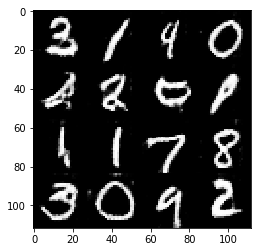

Epoch 2/2... Batch 610... Discriminator Loss: 1.2831... Generator Loss: 0.6136
Epoch 2/2... Batch 620... Discriminator Loss: 1.1849... Generator Loss: 0.6971
Epoch 2/2... Batch 630... Discriminator Loss: 0.9631... Generator Loss: 0.9971
Epoch 2/2... Batch 640... Discriminator Loss: 1.4096... Generator Loss: 0.4999
Epoch 2/2... Batch 650... Discriminator Loss: 1.4731... Generator Loss: 0.4684
Epoch 2/2... Batch 660... Discriminator Loss: 1.2074... Generator Loss: 0.7154
Epoch 2/2... Batch 670... Discriminator Loss: 0.9084... Generator Loss: 1.1112
Epoch 2/2... Batch 680... Discriminator Loss: 1.0184... Generator Loss: 0.8828
Epoch 2/2... Batch 690... Discriminator Loss: 1.0178... Generator Loss: 0.9476
Epoch 2/2... Batch 700... Discriminator Loss: 1.1554... Generator Loss: 0.8319


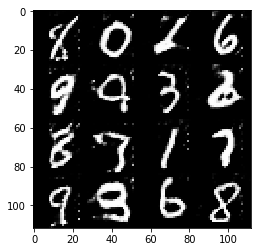

Epoch 2/2... Batch 710... Discriminator Loss: 1.0741... Generator Loss: 1.0984
Epoch 2/2... Batch 720... Discriminator Loss: 1.0658... Generator Loss: 1.5136
Epoch 2/2... Batch 730... Discriminator Loss: 1.6900... Generator Loss: 0.3879
Epoch 2/2... Batch 740... Discriminator Loss: 1.1580... Generator Loss: 1.1322
Epoch 2/2... Batch 750... Discriminator Loss: 1.1412... Generator Loss: 1.9058
Epoch 2/2... Batch 760... Discriminator Loss: 0.9668... Generator Loss: 1.3645
Epoch 2/2... Batch 770... Discriminator Loss: 0.9245... Generator Loss: 1.2154
Epoch 2/2... Batch 780... Discriminator Loss: 0.9317... Generator Loss: 1.0902
Epoch 2/2... Batch 790... Discriminator Loss: 1.0584... Generator Loss: 1.0653
Epoch 2/2... Batch 800... Discriminator Loss: 1.4035... Generator Loss: 0.5176


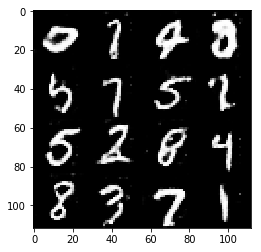

Epoch 2/2... Batch 810... Discriminator Loss: 0.9753... Generator Loss: 2.0542
Epoch 2/2... Batch 820... Discriminator Loss: 0.9546... Generator Loss: 0.9870
Epoch 2/2... Batch 830... Discriminator Loss: 0.7226... Generator Loss: 1.7010
Epoch 2/2... Batch 840... Discriminator Loss: 1.3230... Generator Loss: 0.6245
Epoch 2/2... Batch 850... Discriminator Loss: 0.9388... Generator Loss: 1.1075
Epoch 2/2... Batch 860... Discriminator Loss: 1.2859... Generator Loss: 0.6722
Epoch 2/2... Batch 870... Discriminator Loss: 1.7226... Generator Loss: 3.1295
Epoch 2/2... Batch 880... Discriminator Loss: 0.9440... Generator Loss: 1.3943
Epoch 2/2... Batch 890... Discriminator Loss: 1.0247... Generator Loss: 0.9014
Epoch 2/2... Batch 900... Discriminator Loss: 0.8053... Generator Loss: 1.2274


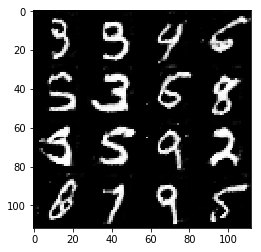

Epoch 2/2... Batch 910... Discriminator Loss: 1.4327... Generator Loss: 0.5181
Epoch 2/2... Batch 920... Discriminator Loss: 1.0365... Generator Loss: 0.9390
Epoch 2/2... Batch 930... Discriminator Loss: 2.2582... Generator Loss: 0.2633


In [12]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
         

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 1.5390... Generator Loss: 0.5223
Epoch 1/1... Batch 20... Discriminator Loss: 0.8476... Generator Loss: 1.1563
Epoch 1/1... Batch 30... Discriminator Loss: 0.7536... Generator Loss: 1.4966
Epoch 1/1... Batch 40... Discriminator Loss: 0.7050... Generator Loss: 1.4718
Epoch 1/1... Batch 50... Discriminator Loss: 0.5177... Generator Loss: 2.4284
Epoch 1/1... Batch 60... Discriminator Loss: 0.5188... Generator Loss: 3.4466
Epoch 1/1... Batch 70... Discriminator Loss: 0.4914... Generator Loss: 2.3090
Epoch 1/1... Batch 80... Discriminator Loss: 0.5858... Generator Loss: 1.8305
Epoch 1/1... Batch 90... Discriminator Loss: 0.5749... Generator Loss: 1.9474
Epoch 1/1... Batch 100... Discriminator Loss: 0.5424... Generator Loss: 2.7746


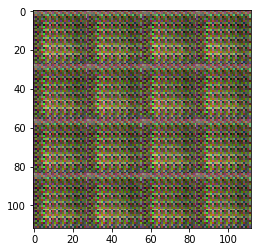

Epoch 1/1... Batch 110... Discriminator Loss: 1.0227... Generator Loss: 0.8380
Epoch 1/1... Batch 120... Discriminator Loss: 0.4666... Generator Loss: 3.3508
Epoch 1/1... Batch 130... Discriminator Loss: 0.4386... Generator Loss: 3.0207
Epoch 1/1... Batch 140... Discriminator Loss: 0.5080... Generator Loss: 2.4585
Epoch 1/1... Batch 150... Discriminator Loss: 0.7203... Generator Loss: 1.4489
Epoch 1/1... Batch 160... Discriminator Loss: 1.0187... Generator Loss: 1.1491
Epoch 1/1... Batch 170... Discriminator Loss: 0.7683... Generator Loss: 1.6195
Epoch 1/1... Batch 180... Discriminator Loss: 0.5427... Generator Loss: 2.6302
Epoch 1/1... Batch 190... Discriminator Loss: 0.6754... Generator Loss: 1.7706
Epoch 1/1... Batch 200... Discriminator Loss: 0.8235... Generator Loss: 1.1765


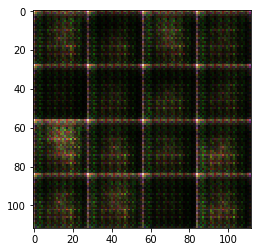

Epoch 1/1... Batch 210... Discriminator Loss: 0.7527... Generator Loss: 1.5751
Epoch 1/1... Batch 220... Discriminator Loss: 0.7594... Generator Loss: 1.4784
Epoch 1/1... Batch 230... Discriminator Loss: 0.7136... Generator Loss: 1.7256
Epoch 1/1... Batch 240... Discriminator Loss: 0.8661... Generator Loss: 1.8343
Epoch 1/1... Batch 250... Discriminator Loss: 1.4228... Generator Loss: 0.5457
Epoch 1/1... Batch 260... Discriminator Loss: 0.9156... Generator Loss: 1.5527
Epoch 1/1... Batch 270... Discriminator Loss: 0.8960... Generator Loss: 1.3380
Epoch 1/1... Batch 280... Discriminator Loss: 0.9892... Generator Loss: 1.4253
Epoch 1/1... Batch 290... Discriminator Loss: 0.9622... Generator Loss: 1.5411
Epoch 1/1... Batch 300... Discriminator Loss: 1.1300... Generator Loss: 0.9481


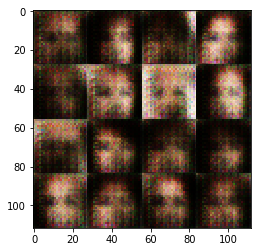

Epoch 1/1... Batch 310... Discriminator Loss: 1.0362... Generator Loss: 0.9416
Epoch 1/1... Batch 320... Discriminator Loss: 0.8106... Generator Loss: 2.2507
Epoch 1/1... Batch 330... Discriminator Loss: 0.6247... Generator Loss: 2.0992
Epoch 1/1... Batch 340... Discriminator Loss: 1.0895... Generator Loss: 1.0760
Epoch 1/1... Batch 350... Discriminator Loss: 0.8417... Generator Loss: 1.2678
Epoch 1/1... Batch 360... Discriminator Loss: 0.7906... Generator Loss: 1.8968
Epoch 1/1... Batch 370... Discriminator Loss: 1.0713... Generator Loss: 0.9427
Epoch 1/1... Batch 380... Discriminator Loss: 0.7547... Generator Loss: 1.8102
Epoch 1/1... Batch 390... Discriminator Loss: 1.0658... Generator Loss: 0.8778
Epoch 1/1... Batch 400... Discriminator Loss: 0.7620... Generator Loss: 1.4499


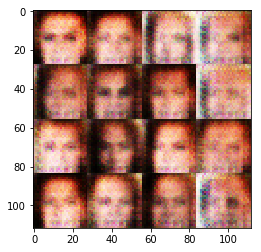

Epoch 1/1... Batch 410... Discriminator Loss: 1.0814... Generator Loss: 0.9462
Epoch 1/1... Batch 420... Discriminator Loss: 1.0955... Generator Loss: 0.8584
Epoch 1/1... Batch 430... Discriminator Loss: 0.9136... Generator Loss: 1.3509
Epoch 1/1... Batch 440... Discriminator Loss: 0.9194... Generator Loss: 1.0833
Epoch 1/1... Batch 450... Discriminator Loss: 1.1408... Generator Loss: 0.8095
Epoch 1/1... Batch 460... Discriminator Loss: 0.9303... Generator Loss: 1.2554
Epoch 1/1... Batch 470... Discriminator Loss: 0.8766... Generator Loss: 1.4084
Epoch 1/1... Batch 480... Discriminator Loss: 1.0561... Generator Loss: 1.5457
Epoch 1/1... Batch 490... Discriminator Loss: 1.2457... Generator Loss: 2.0550
Epoch 1/1... Batch 500... Discriminator Loss: 1.2398... Generator Loss: 0.8283


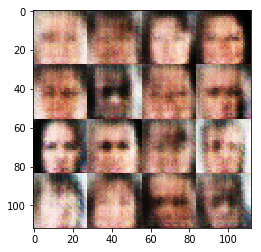

Epoch 1/1... Batch 510... Discriminator Loss: 1.0131... Generator Loss: 2.0166
Epoch 1/1... Batch 520... Discriminator Loss: 1.2496... Generator Loss: 0.8145
Epoch 1/1... Batch 530... Discriminator Loss: 1.3491... Generator Loss: 1.7681
Epoch 1/1... Batch 540... Discriminator Loss: 1.2759... Generator Loss: 0.7104
Epoch 1/1... Batch 550... Discriminator Loss: 1.2837... Generator Loss: 0.7428
Epoch 1/1... Batch 560... Discriminator Loss: 1.0352... Generator Loss: 1.0413
Epoch 1/1... Batch 570... Discriminator Loss: 1.3904... Generator Loss: 0.5566
Epoch 1/1... Batch 580... Discriminator Loss: 1.1597... Generator Loss: 0.9814
Epoch 1/1... Batch 590... Discriminator Loss: 1.0341... Generator Loss: 0.9911
Epoch 1/1... Batch 600... Discriminator Loss: 1.1068... Generator Loss: 0.8145


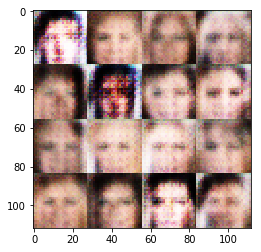

Epoch 1/1... Batch 610... Discriminator Loss: 1.2978... Generator Loss: 0.8194
Epoch 1/1... Batch 620... Discriminator Loss: 0.9836... Generator Loss: 1.3514
Epoch 1/1... Batch 630... Discriminator Loss: 1.1548... Generator Loss: 0.9797
Epoch 1/1... Batch 640... Discriminator Loss: 1.2817... Generator Loss: 1.2495
Epoch 1/1... Batch 650... Discriminator Loss: 1.1527... Generator Loss: 0.9748
Epoch 1/1... Batch 660... Discriminator Loss: 1.0491... Generator Loss: 1.2745
Epoch 1/1... Batch 670... Discriminator Loss: 1.0353... Generator Loss: 1.3063
Epoch 1/1... Batch 680... Discriminator Loss: 1.1870... Generator Loss: 0.8653
Epoch 1/1... Batch 690... Discriminator Loss: 1.0488... Generator Loss: 1.2572
Epoch 1/1... Batch 700... Discriminator Loss: 1.0261... Generator Loss: 1.0731


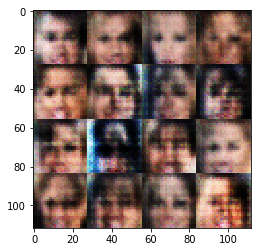

Epoch 1/1... Batch 710... Discriminator Loss: 1.4365... Generator Loss: 0.5031
Epoch 1/1... Batch 720... Discriminator Loss: 1.1697... Generator Loss: 1.0342
Epoch 1/1... Batch 730... Discriminator Loss: 0.9893... Generator Loss: 1.2528
Epoch 1/1... Batch 740... Discriminator Loss: 1.0293... Generator Loss: 1.2029
Epoch 1/1... Batch 750... Discriminator Loss: 1.1250... Generator Loss: 0.8801
Epoch 1/1... Batch 760... Discriminator Loss: 0.9156... Generator Loss: 1.3005
Epoch 1/1... Batch 770... Discriminator Loss: 1.0473... Generator Loss: 0.9467
Epoch 1/1... Batch 780... Discriminator Loss: 1.1347... Generator Loss: 0.8065
Epoch 1/1... Batch 790... Discriminator Loss: 1.0731... Generator Loss: 1.4685
Epoch 1/1... Batch 800... Discriminator Loss: 1.1075... Generator Loss: 1.2727


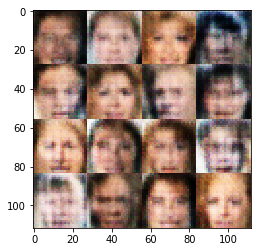

Epoch 1/1... Batch 810... Discriminator Loss: 0.9993... Generator Loss: 1.7365
Epoch 1/1... Batch 820... Discriminator Loss: 1.1154... Generator Loss: 0.9336
Epoch 1/1... Batch 830... Discriminator Loss: 0.9787... Generator Loss: 1.1417
Epoch 1/1... Batch 840... Discriminator Loss: 1.1215... Generator Loss: 0.8840
Epoch 1/1... Batch 850... Discriminator Loss: 1.0386... Generator Loss: 1.0621
Epoch 1/1... Batch 860... Discriminator Loss: 1.1689... Generator Loss: 0.8814
Epoch 1/1... Batch 870... Discriminator Loss: 1.2918... Generator Loss: 0.6405
Epoch 1/1... Batch 880... Discriminator Loss: 0.9765... Generator Loss: 1.2470
Epoch 1/1... Batch 890... Discriminator Loss: 1.0637... Generator Loss: 1.6932
Epoch 1/1... Batch 900... Discriminator Loss: 1.1157... Generator Loss: 0.8006


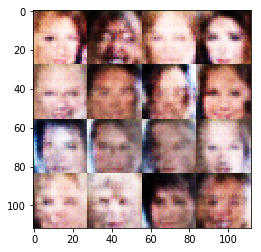

Epoch 1/1... Batch 910... Discriminator Loss: 1.0392... Generator Loss: 0.9702
Epoch 1/1... Batch 920... Discriminator Loss: 1.0974... Generator Loss: 0.9587
Epoch 1/1... Batch 930... Discriminator Loss: 1.2878... Generator Loss: 2.3805
Epoch 1/1... Batch 940... Discriminator Loss: 1.1099... Generator Loss: 0.8967
Epoch 1/1... Batch 950... Discriminator Loss: 1.2256... Generator Loss: 1.1992
Epoch 1/1... Batch 960... Discriminator Loss: 1.1346... Generator Loss: 1.4930
Epoch 1/1... Batch 970... Discriminator Loss: 1.1723... Generator Loss: 0.6910
Epoch 1/1... Batch 980... Discriminator Loss: 1.1160... Generator Loss: 0.8955
Epoch 1/1... Batch 990... Discriminator Loss: 1.2086... Generator Loss: 0.7188
Epoch 1/1... Batch 1000... Discriminator Loss: 0.8397... Generator Loss: 1.3258


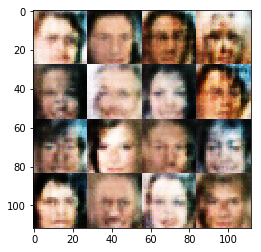

Epoch 1/1... Batch 1010... Discriminator Loss: 1.1492... Generator Loss: 1.2775
Epoch 1/1... Batch 1020... Discriminator Loss: 1.0615... Generator Loss: 1.1586
Epoch 1/1... Batch 1030... Discriminator Loss: 1.0814... Generator Loss: 0.9825
Epoch 1/1... Batch 1040... Discriminator Loss: 1.1591... Generator Loss: 1.0795
Epoch 1/1... Batch 1050... Discriminator Loss: 1.1628... Generator Loss: 0.8043
Epoch 1/1... Batch 1060... Discriminator Loss: 1.1745... Generator Loss: 0.9841
Epoch 1/1... Batch 1070... Discriminator Loss: 1.1749... Generator Loss: 0.7813
Epoch 1/1... Batch 1080... Discriminator Loss: 1.0279... Generator Loss: 1.2911
Epoch 1/1... Batch 1090... Discriminator Loss: 1.1876... Generator Loss: 1.0683
Epoch 1/1... Batch 1100... Discriminator Loss: 1.2755... Generator Loss: 0.6207


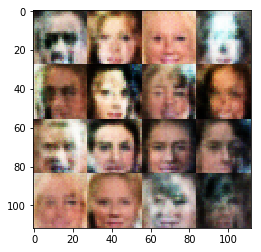

Epoch 1/1... Batch 1110... Discriminator Loss: 0.9777... Generator Loss: 1.2919
Epoch 1/1... Batch 1120... Discriminator Loss: 1.1002... Generator Loss: 1.0626
Epoch 1/1... Batch 1130... Discriminator Loss: 1.1720... Generator Loss: 0.7469
Epoch 1/1... Batch 1140... Discriminator Loss: 1.1050... Generator Loss: 0.7997
Epoch 1/1... Batch 1150... Discriminator Loss: 0.8846... Generator Loss: 1.7994
Epoch 1/1... Batch 1160... Discriminator Loss: 0.9900... Generator Loss: 1.2592
Epoch 1/1... Batch 1170... Discriminator Loss: 1.0458... Generator Loss: 1.2808
Epoch 1/1... Batch 1180... Discriminator Loss: 0.9568... Generator Loss: 1.1422
Epoch 1/1... Batch 1190... Discriminator Loss: 1.0881... Generator Loss: 1.2868
Epoch 1/1... Batch 1200... Discriminator Loss: 1.2169... Generator Loss: 0.7181


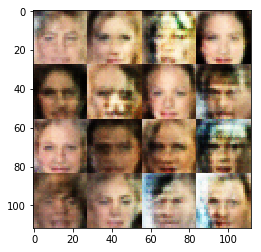

Epoch 1/1... Batch 1210... Discriminator Loss: 1.0885... Generator Loss: 1.0271
Epoch 1/1... Batch 1220... Discriminator Loss: 1.1504... Generator Loss: 0.9271
Epoch 1/1... Batch 1230... Discriminator Loss: 1.1184... Generator Loss: 0.9428
Epoch 1/1... Batch 1240... Discriminator Loss: 1.0814... Generator Loss: 0.8932
Epoch 1/1... Batch 1250... Discriminator Loss: 1.1378... Generator Loss: 0.9326
Epoch 1/1... Batch 1260... Discriminator Loss: 1.1722... Generator Loss: 0.8822
Epoch 1/1... Batch 1270... Discriminator Loss: 1.2778... Generator Loss: 0.6714
Epoch 1/1... Batch 1280... Discriminator Loss: 1.0797... Generator Loss: 0.9262
Epoch 1/1... Batch 1290... Discriminator Loss: 1.0465... Generator Loss: 0.8454
Epoch 1/1... Batch 1300... Discriminator Loss: 1.0685... Generator Loss: 1.1604


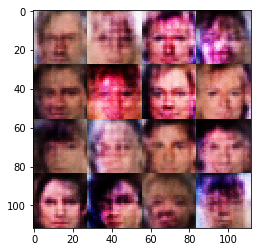

Epoch 1/1... Batch 1310... Discriminator Loss: 1.1108... Generator Loss: 0.9618
Epoch 1/1... Batch 1320... Discriminator Loss: 1.2576... Generator Loss: 1.6739
Epoch 1/1... Batch 1330... Discriminator Loss: 1.4002... Generator Loss: 0.5929
Epoch 1/1... Batch 1340... Discriminator Loss: 1.2032... Generator Loss: 0.7251
Epoch 1/1... Batch 1350... Discriminator Loss: 1.1534... Generator Loss: 0.7640
Epoch 1/1... Batch 1360... Discriminator Loss: 1.3256... Generator Loss: 0.6175
Epoch 1/1... Batch 1370... Discriminator Loss: 1.1016... Generator Loss: 0.9560
Epoch 1/1... Batch 1380... Discriminator Loss: 1.2093... Generator Loss: 0.8480
Epoch 1/1... Batch 1390... Discriminator Loss: 1.5026... Generator Loss: 0.4653
Epoch 1/1... Batch 1400... Discriminator Loss: 1.1858... Generator Loss: 0.7546


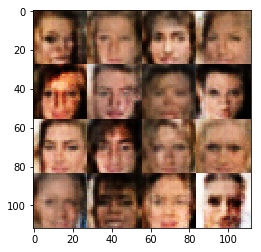

Epoch 1/1... Batch 1410... Discriminator Loss: 1.1740... Generator Loss: 0.8832
Epoch 1/1... Batch 1420... Discriminator Loss: 1.1177... Generator Loss: 0.9331
Epoch 1/1... Batch 1430... Discriminator Loss: 1.2022... Generator Loss: 0.7015
Epoch 1/1... Batch 1440... Discriminator Loss: 1.1804... Generator Loss: 0.7788
Epoch 1/1... Batch 1450... Discriminator Loss: 1.2514... Generator Loss: 1.0277
Epoch 1/1... Batch 1460... Discriminator Loss: 1.1829... Generator Loss: 0.9230
Epoch 1/1... Batch 1470... Discriminator Loss: 1.2872... Generator Loss: 0.6974
Epoch 1/1... Batch 1480... Discriminator Loss: 1.1641... Generator Loss: 0.8253
Epoch 1/1... Batch 1490... Discriminator Loss: 1.1547... Generator Loss: 0.9919
Epoch 1/1... Batch 1500... Discriminator Loss: 1.2822... Generator Loss: 0.6454


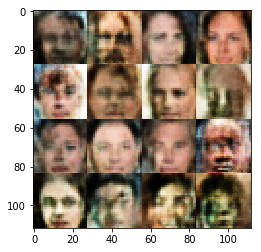

Epoch 1/1... Batch 1510... Discriminator Loss: 1.0559... Generator Loss: 1.0601
Epoch 1/1... Batch 1520... Discriminator Loss: 1.1484... Generator Loss: 1.0071
Epoch 1/1... Batch 1530... Discriminator Loss: 1.2025... Generator Loss: 0.7286
Epoch 1/1... Batch 1540... Discriminator Loss: 1.2656... Generator Loss: 0.6398
Epoch 1/1... Batch 1550... Discriminator Loss: 1.0712... Generator Loss: 1.1399
Epoch 1/1... Batch 1560... Discriminator Loss: 1.0538... Generator Loss: 1.1874
Epoch 1/1... Batch 1570... Discriminator Loss: 1.0039... Generator Loss: 1.1717
Epoch 1/1... Batch 1580... Discriminator Loss: 1.1139... Generator Loss: 0.9365
Epoch 1/1... Batch 1590... Discriminator Loss: 1.0163... Generator Loss: 1.2383
Epoch 1/1... Batch 1600... Discriminator Loss: 1.0741... Generator Loss: 0.8588


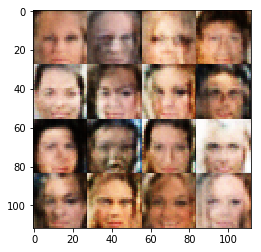

Epoch 1/1... Batch 1610... Discriminator Loss: 1.1832... Generator Loss: 0.9116
Epoch 1/1... Batch 1620... Discriminator Loss: 1.3882... Generator Loss: 0.9641
Epoch 1/1... Batch 1630... Discriminator Loss: 1.1339... Generator Loss: 0.9035
Epoch 1/1... Batch 1640... Discriminator Loss: 0.9850... Generator Loss: 1.0582


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)
          

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.